# Resources
https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager

https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item

# IMPORTS

In [1]:
from arcgishub import hub
from arcgis.gis import GIS

import configparser
import datetime
import json
import os

# VARIABLES

In [2]:
# # # initiative_id = "5a9bc8dfb3e54817ac61fa4d8aa33cc0"  # PROD
initiative_id = "5d230c46f10b4c91a60c54e9bca879b6"  # J's demo site cloned to mdimapdatacatalog account

# Credentials access and variable creation
credentials_file = fr"..\Credentials\Credentials.cfg"

assert os.path.exists(credentials_file)
config_parser = configparser.ConfigParser()
config_parser.read(credentials_file)

# md_url = config_parser["DEFAULT"]["url_hub"]
md_url = config_parser["DEFAULT"]["url_maps"]
md_admin = config_parser["DEFAULT"]["login"]
md_pwd = config_parser["DEFAULT"]["password"]

# Destination folder for clones
clone_to_folder = "Hub Clone Automation DEVELOPMENT"

In [3]:
# Check on the creds being used
# print(f"URL: {md_url}")
# print(f"ADMIN: {md_admin}")
# print(f"PWD: {md_pwd}")

# FUNCTIONALITY

### Standard ArcGIS API for Python
Notes: Using the standard clone items method only seems to clone the initiative and not the entire package. Also, don't seem to have control over the name and location

In [ ]:
# Create a gis connection with regular arcgis api and explore visibility of target initiative
gis = GIS(url=md_url, username=md_admin, password=md_pwd) # "old" way
my_hub_standard = gis.hub

In [ ]:
# Searches for all initiatives visible to the account being used - takes a little time to run
# my_hub_standard.initiatives.search()

In [ ]:
target_initiative_standard = my_hub_standard.initiatives.get(initiative_id)
item_standard = target_initiative_standard.item

In [ ]:
# Clone item using the standard arcgis api
cloned = gis.content.clone_items([item_standard], folder=clone_to_folder)
cloned
# NOTE: This only seems to clone the initiative and not the entire package. 
#  Also, don't seem to have control over the name and location

In [ ]:
for item_obj in cloned:
    print(item_obj.title)
    print(item_obj.id)
    print(item_obj.owner)

### "New" arcgishub Module
Notes: Succeeding in cloning site and app, and moving items to the backup folder. But, they don't load in a browser. You receive an error message like "Domain lookup for 03_30_20-21_22-backup-dev-clone-process-orig-init-maryland.hub.arcgis.com failed with code: undefined"

In [12]:
# Create a connection to the hub using the "new" arcgishub module and explore visibility of target initiative
my_hub_arcgishub = hub.Hub(url=md_url, username=md_admin, password=md_pwd)

In [13]:
# Searches for all initiatives visible to the account being used - takes a little time to run
# my_hub_arcgishub.initiatives.search()

<Item title:"DEV Clone Process Orig Init" type:Hub Initiative owner:mdimapdatacatalog>
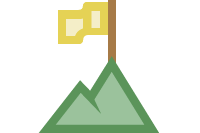

In [14]:
# Gets a specific initiative
target_initiative_arcgishub = my_hub_arcgishub.initiatives.get(initiative_id)
target_initiative_arcgishub.item

In [15]:
current_title_arcgishub = target_initiative_arcgishub.title
current_title_arcgishub

'DEV Clone Process Orig Init'

In [16]:
# Clone name backup text, must be reset each time a clone is requested or the stored value leads to duplication issue
# TODO: Search for a format that doesn't result in an unusable url
date_format = "%y%m%d-%H%M"
backup_text = f"DEVCovidBackup-{datetime.datetime.now().strftime(date_format)}"

# This seems to take a few minutes to complete
cloned_initiative_arcgishub = my_hub_arcgishub.initiatives.clone(target_initiative_arcgishub, title=f"{backup_text}")
cloned_initiative_arcgishub

<Initiative title:"DEVCovidBackup-200331-0751" owner:mdimapdatacatalog>

In [17]:
site2 = my_hub_arcgishub.sites.get(cloned_initiative_arcgishub.site_id)
site2.item

<Item title:"DEVCovidBackup-200331-0751" type:Hub Site Application owner:mdimapdatacatalog>

In [18]:
# Move item to backup folder
move_initiative_result = cloned_initiative_arcgishub.item.move(folder=clone_to_folder)
move_initiative_result

{'success': True,
 'itemId': 'a8b5204e42344039a1976d51e0ea6365',
 'owner': 'mdimapdatacatalog',
 'folder': 'c8b44f9672594a939ef76d8b335e8a0b'}

In [19]:
# Note: Initially only moved the application and not the initiative to the backup folder
# EXCEPTION thrown when item already exists in folder, either because of duplicated names or item already in folder
move_asset_result = site2.item.move(folder=clone_to_folder)
move_asset_result

{'success': True,
 'itemId': 'cc2d0dfd0cbf4c8f86400c15745e6484',
 'owner': 'mdimapdatacatalog',
 'folder': 'c8b44f9672594a939ef76d8b335e8a0b'}